In [3]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud

In [13]:
# Tải tài nguyên cần thiết từ nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Download the resource for English specifically
nltk.download('averaged_perceptron_tagger_eng')  # This line is added to download the resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [11]:
# 1. Đọc file
with open('/content/Alice in Wonderland.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

In [14]:
# 2. Làm sạch văn bản
clean_text = re.sub(r'\*{3}.*?\*{3}', '', raw_text, flags=re.DOTALL)  # xóa metadata
clean_text = re.sub(r'\[.*?\]', '', clean_text)  # [Illustration]
clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)  # bỏ ký tự đặc biệt
clean_text = clean_text.lower()

# 3. Tách từ
tokens = word_tokenize(clean_text)

# 4. Loại bỏ stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

# 5. POS tagging + lemmatization chuẩn
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tagged_tokens = pos_tag(tokens)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [
    lemmatizer.lemmatize(word, get_wordnet_pos(pos))
    for word, pos in tagged_tokens
]

In [15]:
# 6. Tính tần suất từ
word_freq = Counter(lemmatized_tokens)

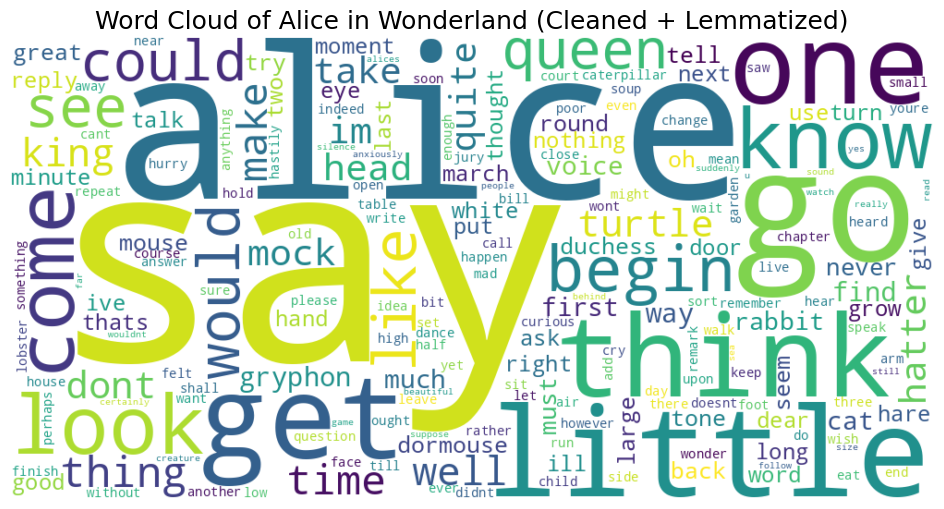

In [16]:
# 7. Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Alice in Wonderland (Cleaned + Lemmatized)', fontsize=18)
plt.show()

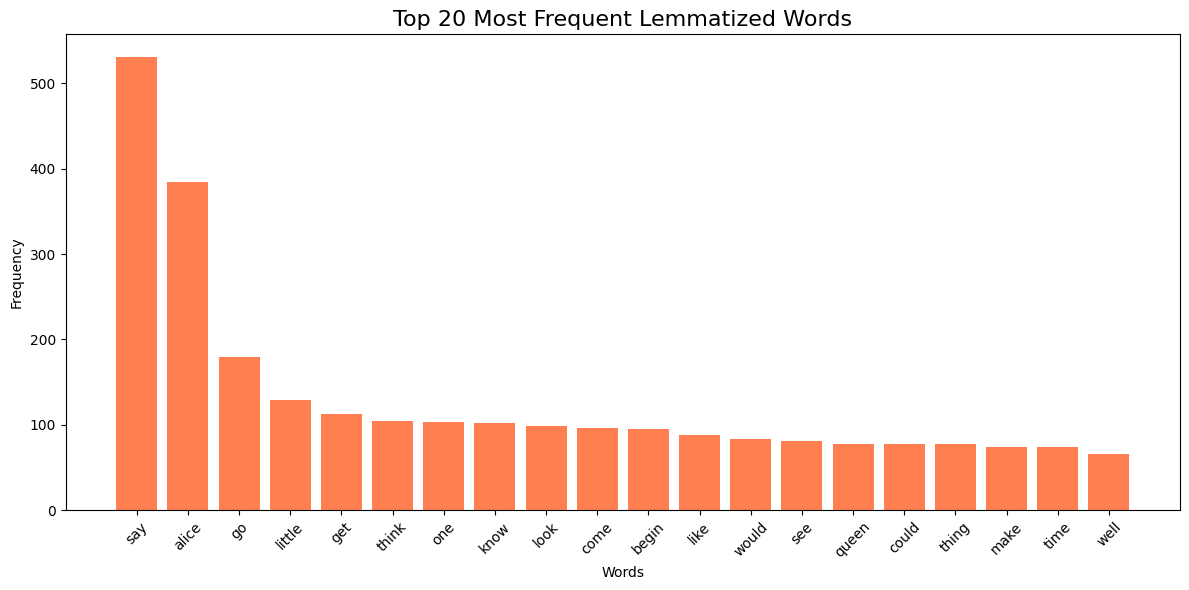

In [17]:
# 8. Bar Chart top 20
top_n = 20
common_words = word_freq.most_common(top_n)
words, freqs = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, freqs, color='coral')
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Most Frequent Lemmatized Words', fontsize=16)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()